# Data Mining Project

## Yonatan Golan, Ziv Haba

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings # Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [2]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

## Data information:

In [7]:
df = pd.read_csv("./hotels_train.csv")
df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [8]:
df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

## Data statistics:

#### Split to attributes and taget

In [10]:
target =pd.DataFrame(df['is_canceled']) 
data = df.drop(['ID', 'is_canceled'], axis=1)
data

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018
1,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018
2,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018
3,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018
4,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,Room_Type 1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018
27209,0,4,Room_Type 1,half board,2,0,0,0,1,18.0,Online,0,0,0,113.0,2/24/2018
27210,0,2,Room_Type 1,NaN,2,0,0,0,0,147.0,Offline,0,0,0,105.0,4/15/2018
27211,1,0,Room_Type 4,half board,1,0,0,0,0,3.0,Aviation,0,0,0,130.0,5/22/2018


#### Split to nominal and numerical attributes

In [13]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'n_adults', 'n_less_12', 'n_more_12',
       'booked_tour', 'n_requests', 'lead_time', 'n_p_cacellation',
       'n_p_not_cacellation', 'repeated', 'price'],
      dtype='object')

In [14]:
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)

### Numerical data

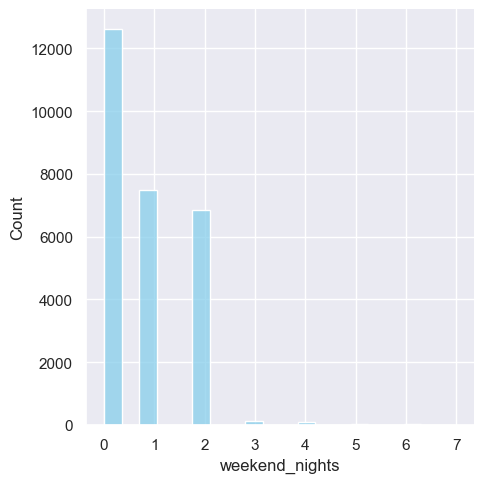

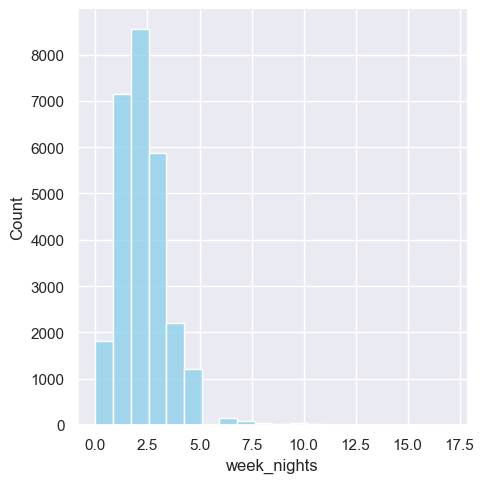

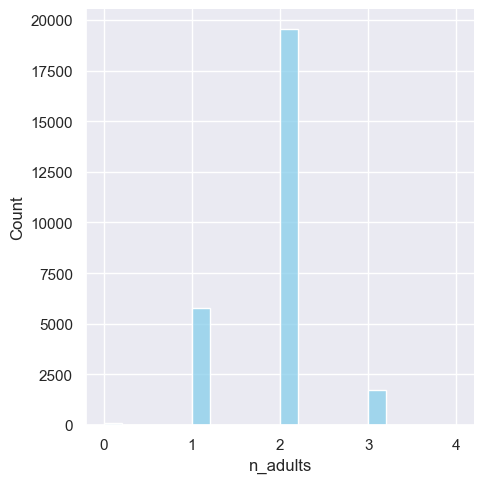

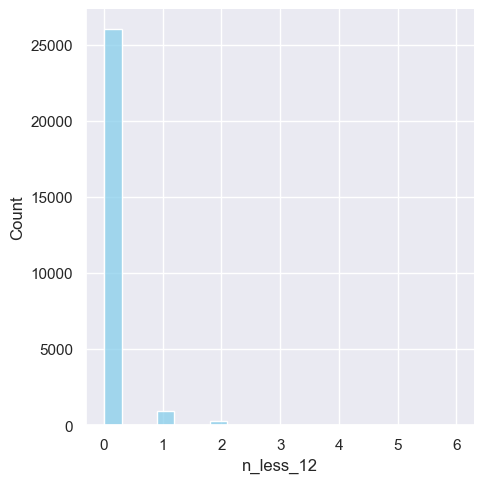

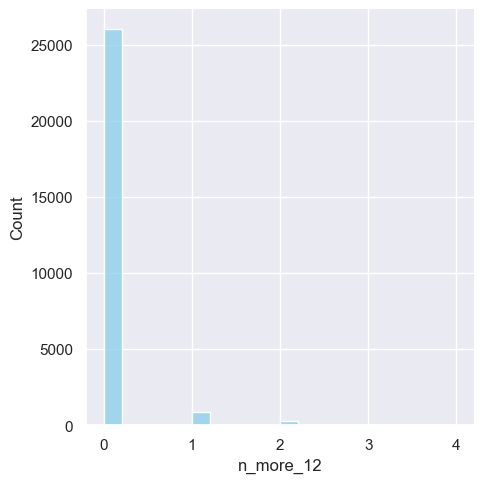

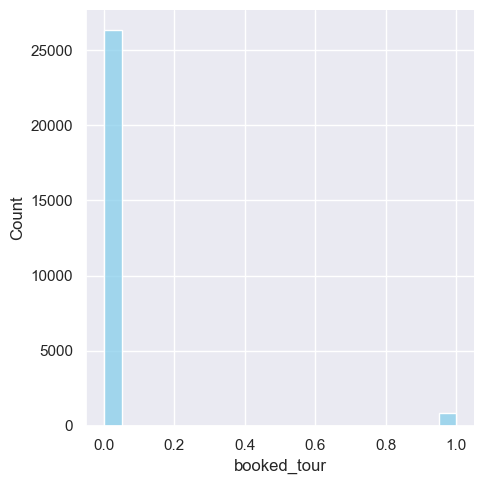

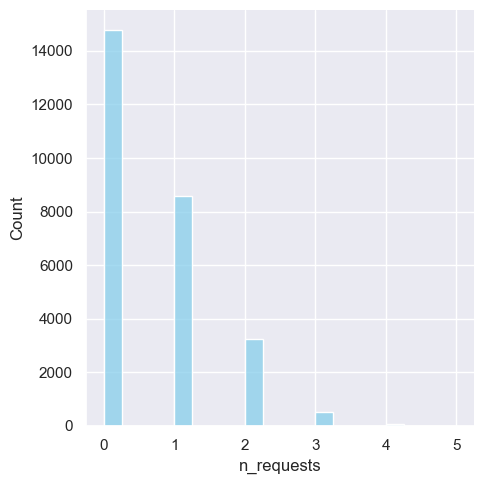

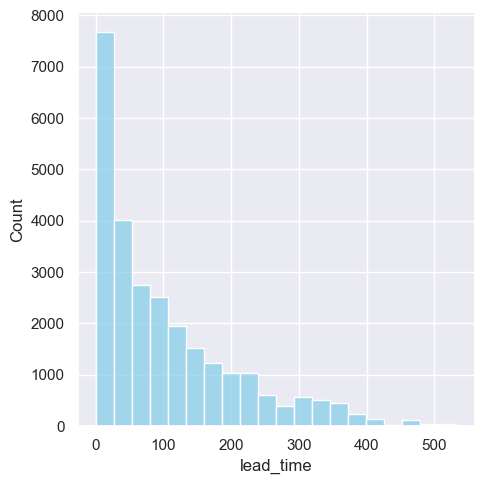

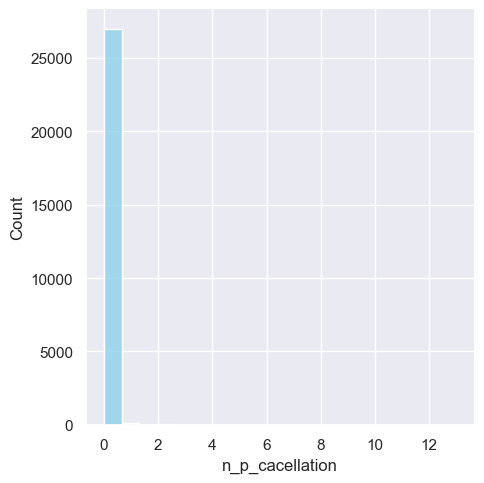

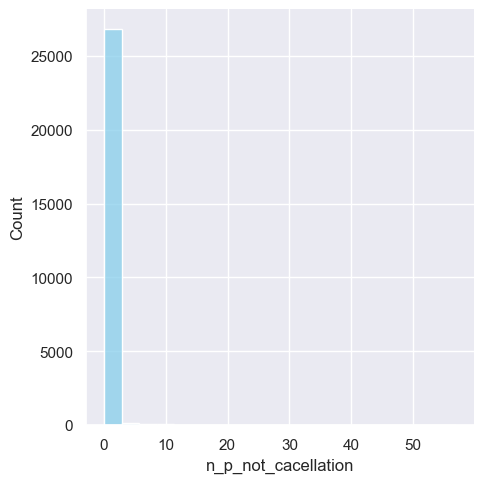

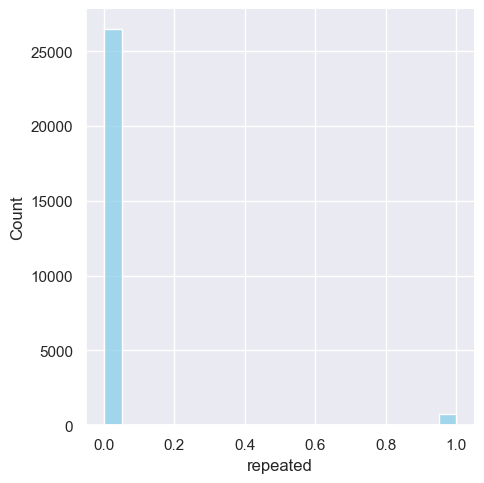

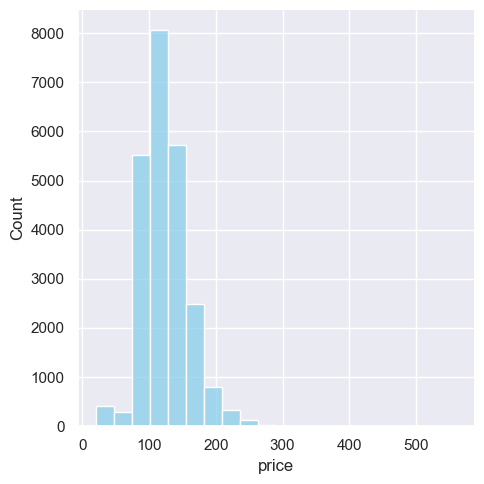

In [15]:
for col in numeric_col:
    sns.displot(numeric_data[col], bins=20, color='skyblue')

#### Skweness